# Classfiying Iris flowers using Exploratory Data Analysis and Correlation Matrix

## 1. import packages

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## 2. read dataset and understand the structure

In [4]:
df = pd.read_csv('data\iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#displays the count of each species
df['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

## 3. preprocess data

In [10]:
#check for null values
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

## 4. data exploration

### histograms

<AxesSubplot:>

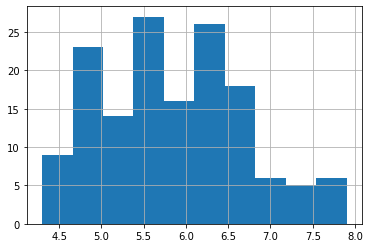

In [14]:
df['sepal.length'].hist()

<AxesSubplot:>

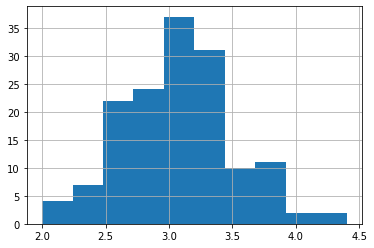

In [15]:
df['sepal.width'].hist()

<AxesSubplot:>

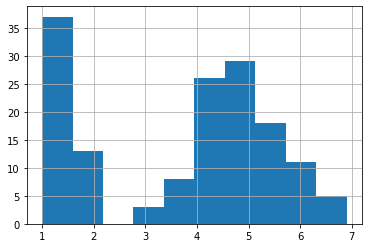

In [16]:
df['petal.length'].hist()

<AxesSubplot:>

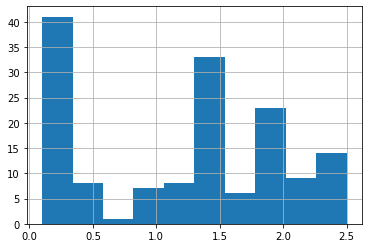

In [17]:
df['petal.width'].hist()

### scatterplots

In [23]:
colors = ['red', 'orange', 'blue']
species = ['Virginica','Versicolor','Setosa']

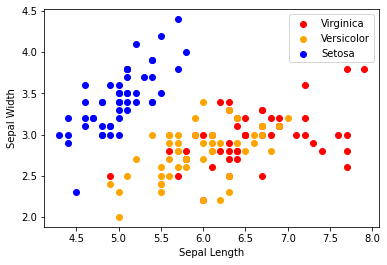

In [25]:
for i in range(3):
    x = df[df['variety'] == species[i]]
    plt.scatter(x['sepal.length'], x['sepal.width'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

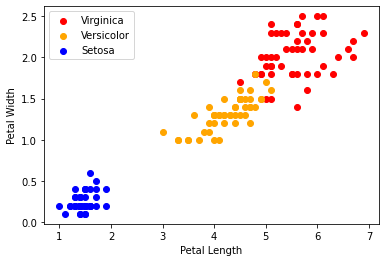

In [26]:
for i in range(3):
    x = df[df['variety'] == species[i]]
    plt.scatter(x['petal.length'], x['petal.width'], c = colors[i], label = species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

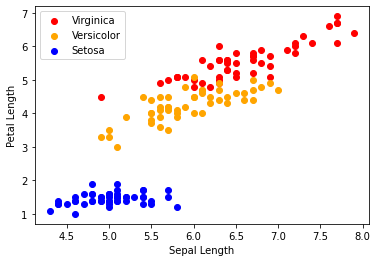

In [28]:
for i in range(3):
    x = df[df['variety'] == species[i]]
    plt.scatter(x['sepal.length'], x['petal.length'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

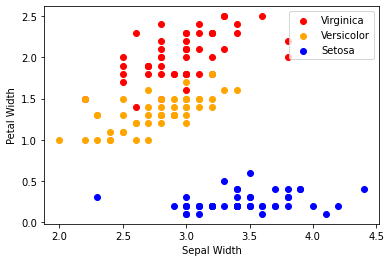

In [29]:
for i in range(3):
    x = df[df['variety'] == species[i]]
    plt.scatter(x['sepal.width'], x['petal.width'], c = colors[i], label = species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

## 5. correlation matrix

In [31]:
#displaying correlation between variables as a table
df.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

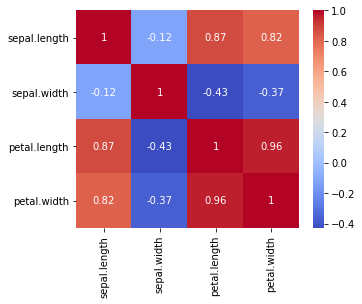

In [39]:
#now showing correlation as a heatmap to be more useful
corr = df.corr()
fig, ax = plt.subplots(figsize = (5,4)) #set size of map with matplotlib
sns.heatmap(corr, annot = True, ax = ax, cmap = 'coolwarm') #using seaborn to display

## 6. label encoding
### converting labels into numeric form so that it is machine-readable

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [41]:
df['variety'] = le.fit_transform(df['variety'])
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 7. model training

In [74]:
from sklearn.model_selection import train_test_split
#train - 70% of set
#test - 30% of set

x = df.drop(columns=['variety'])
y = df['variety']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

## 8. model testing

### running logistic regression

In [75]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [76]:
#model training
model.fit(x_train, y_train)

C:\Users\Justin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
#print metrics to get performance of logistic regression
print("Accuracy:", model.score(x_test, y_test) * 100)

Accuracy: 100.0


### running k nearest neighbors

In [67]:
#knn - k nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [68]:
#model training
model.fit(x_train, y_train)

KNeighborsClassifier()

In [69]:
print("Accuracy:", model.score(x_test, y_test) * 100)

Accuracy: 97.77777777777777


### running decision tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [71]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [72]:
print("Accuracy:", model.score(x_test, y_test) * 100)

Accuracy: 97.77777777777777
